Create a corpus of inaugural speeches of all US Presidents, available from the Miller Center's website (https://millercenter.org/the-presidency/presidential-speeches (Links to an external site.)) or from NLTK's "inaugural" corpus. Add to the corpus the year of the speech and the president’s party affiliation. You can label presidents who did not belong to either the Democratic or Republican parties as “other”. Analyze the textual content of these speeches to answer the following questions.

1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or other presidents have higher vocabulary?

2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in this sample of presidential speeches (excluding stop words). Either color code this barplot for Democratic (blue), Republican (red), and other (gray) presidents, or create three separate barplots for Democratic, Republican, and other presidents respectively.

3. What are the five most frequently used words (exclusive of stop words) used by each president? Do Democratic presidents use a different set of words than Republican presidents? 

4. Compute a sentiment (positive/negative) for each president, and draw three barplots of Democratic, Republican, and other presidents in chronological order. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

In [1]:
import string
from string import punctuation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import inaugural
from collections import defaultdict

In [2]:
#nltk.download('inaugural')
allspeech = inaugural.fileids()
n = len(allspeech)

In [3]:
#Creating President and their Respective Paty Lists:

Republican = ["Abraham Lincoln", "Ulysses Grant", "Rutherford Hayes", "James Garfield", "Chester Arthur", "Benjamin Harrison1", "William McKinley", "Theodore Roosevelt1" , "William Taft" , "Warren Harding", "Calvin Coolidge", "Herbert Hoover", "Dwight Eisenhower", "Richard Nixon", "Gerald Ford", "Ronald Reagan", "George Bush1", "George Bush", "Donald Trump"]
Democrats = ["Andrew Jackson", "Martin VanBuren", "James Polk", "Franklin Pierce", "James Buchanan", "Grover Cleveland", "Woodrow Wilson", "Franklin Roosevelt", "Harry Truman", "John Kennedy", "Lyndon Johnson", "Jimmy Carter", "Bill Clinton", "Barack Obama"]
Federalist = ["George Washington", "John Adams"]
DemocraticRepublican = ["Thomas Jefferson", "James Madison", "James Monroe", "John Adams1"]
Whig = ["William Harrison", "John Tyler", "Zachary Taylor", "Millard Fillmore"]
Union = ["Andrew Johnson"]

partiesdict = {"republican":Republican, "democrats":Democrats, "federalist":Federalist, "democraticrepublican": DemocraticRepublican, "whig":Whig}

for i in partiesdict:
    partiesdict[i] = [x.lower().split()[1] for x in partiesdict[i]]
    print(partiesdict[i]) 

['lincoln', 'grant', 'hayes', 'garfield', 'arthur', 'harrison1', 'mckinley', 'roosevelt1', 'taft', 'harding', 'coolidge', 'hoover', 'eisenhower', 'nixon', 'ford', 'reagan', 'bush1', 'bush', 'trump']
['jackson', 'vanburen', 'polk', 'pierce', 'buchanan', 'cleveland', 'wilson', 'roosevelt', 'truman', 'kennedy', 'johnson', 'carter', 'clinton', 'obama']
['washington', 'adams']
['jefferson', 'madison', 'monroe', 'adams1']
['harrison', 'tyler', 'taylor', 'fillmore']


In [4]:
presidentdict = {}
speechdict = defaultdict(list)
wordsperparties = defaultdict(list)
presidentallwords = defaultdict(list)

import nltk
from nltk.corpus import stopwords
import collections

#Defining Stopwords and Adding other Garbage value in punctuation Dict
stop_words = nltk.corpus.stopwords.words('english')
punctuation = punctuation + '--' + '\x80\x94'

for i,a in enumerate (allspeech):
    key = a.split('.')[0]
    year = a.split('-')[0]
    name = (a.split('-')[1]).split('.')[0].lower()
    if (a == '1905-Roosevelt.txt') | (a == '1989-Bush.txt') | (a == '1825-Adams.txt') | (a == '1889-Harrison.txt'):
        key = key + str(1) #Presidents with similar last names, 1 has been appended to the latest president in Chronology order 
        name = name + str(1)
    for j in partiesdict:
        if name in partiesdict[j]:
            char = inaugural.raw(a)
            speechfile = inaugural.open(a)
            speechlist = speechfile.readlines()
            words = inaugural.words(a)
            #making Clean Wordlist from Inaugral Words, seperating punctuations and stopwords
            wordslist = []
            wordslower = [w.lower() for w in words]
            for w in wordslower:
                if w not in stop_words:
                    wordslist.append(w)
                else:
                    continue
            wordslist = [w for w in wordslist if w not in punctuation]
            sents = inaugural.sents(a)
            vocab = set([w for w in wordslist])
            porter = nltk.stem.PorterStemmer()
            
            #Updating Vocab by seperating punctuations and stopwords followed by stemming using Porter Stemmer
            vocab_revised = [w for w in vocab if w not in stop_words]
            vocab_revised = [w for w in vocab_revised if w not in punctuation]
            vocab_revised = [w for w in vocab_revised if len(w) >1]
            vocab_revised = [porter.stem(w) for w in vocab_revised]
            words_per_sentense = len(wordslist)/len(sents)
            
            words_speech = [w for w in wordslist if w not in stop_words]
            words_speech = [w for w in words_speech if w not in punctuation]
            words_speech = [w for w in words_speech if len(w) >1]
            portstemmed = [porter.stem(w) for w in words_speech]
            portstemmed = [w for w in portstemmed if len(w) >1] #even after stop word removal and stemming some words like 'i', 'u' were present in corpus so filtered it with this
            presidentdict[key] = [name,year,len(char),len(words_speech),len(sents),round(words_per_sentense,2), len(vocab),len(vocab_revised),str(j)]
        
            speechdict[name].append(speechlist)
            presidentallwords[name].append(portstemmed)
        else:
            continue
        if (j == 'republican'):
            wordsperparties[j].append(portstemmed)
        elif (j == 'democrats'):
            wordsperparties[j].append(portstemmed)
        elif ((j == 'democraticrepublican') | (j == 'whig') |(j == 'federalist')):
            wordsperparties['others'].append(portstemmed)

In [5]:
len(presidentdict)
#The president for 1865 was andrew johnson but his speech is not included in the inaugral corpous, instead for 1865, Lincoln's speech is there.

58


### 1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic or Republican presidents have higher vocabulary?


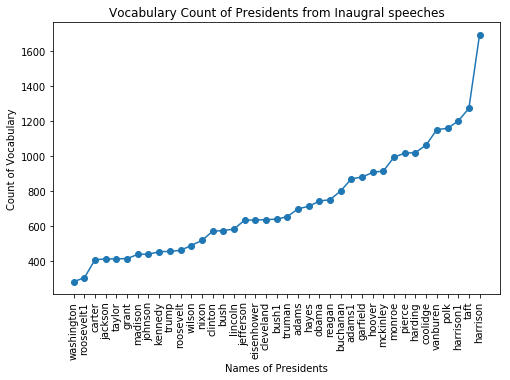

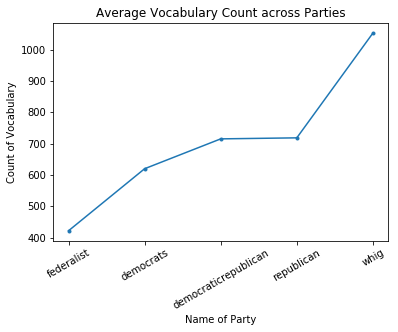

In [6]:
presidentdf = pd.DataFrame([[k, *v] for k, v in presidentdict.items()], columns=['keyname','president_name', 'year','charachters', 'words', 'sentences','words_per_sentences','vocab_with_stop_words','vocab_revised','party_name'])
presidentdf

group1 = presidentdf.groupby('president_name')['vocab_revised'].mean().sort_values()
group2 = presidentdf.groupby('party_name')['vocab_revised'].mean().sort_values()
group2.sort_values()

plt.figure(figsize=(8,5))

plt.plot(group1, 'o-')
plt.title('Vocabulary Count of Presidents from Inaugral speeches')
plt.ylabel('Count of Vocabulary')
plt.xlabel('Names of Presidents')
plt.xticks(rotation=90)
plt.show()

plt.figure()

plt.plot(group2, '.-')
plt.title('Average Vocabulary Count across Parties')
plt.ylabel('Count of Vocabulary')
plt.xlabel('Name of Party')
plt.xticks(rotation=30)
plt.show()

#Source : https://stackoverflow.com/questions/53289238/convert-a-dictionary-to-dataframe-with-specified-column-names

#### Amongst all the presidents, President Washington(1789) had the least vocabulry of about 280 words while President William Harrison(1841) had the most vocabulry of approx. 1800 words

#### Across parties, on average republican presidents had more vocabulary (approx. 700) than democratic presidents (approx 600). The party whig shows the highest vocabulary as there were just 2 presidents with inagrauls speech both of which had high vocabulary (over 1000 words)

### Question 2: Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in this sample of presidential speeches (excluding stop words). Either color code this barplot for Democratic (blue), Republican (red), and other (gray) presidents, or create three separate barplots for Democratic, Republican, and other presidents respectively.

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


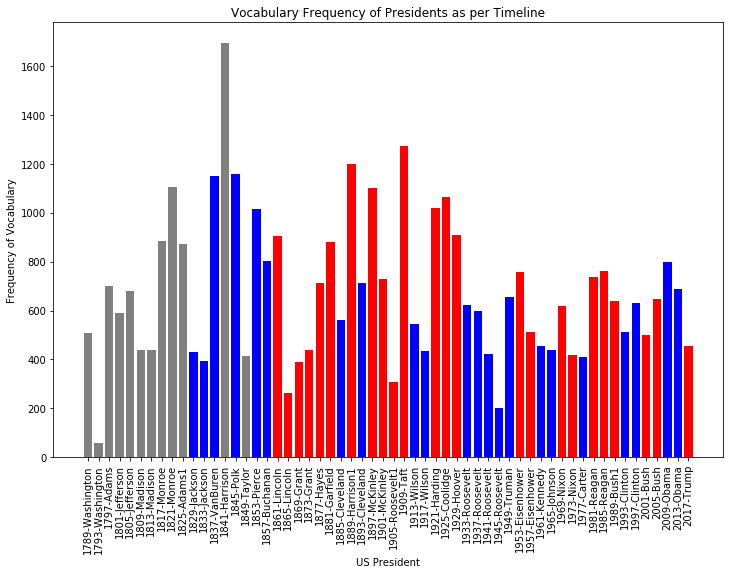

In [7]:
timeline = presidentdf[['keyname','president_name','year','vocab_revised','party_name']]
timeline['party_col'] = 'grey'
timeline.loc[timeline['party_name'] == 'republican', 'party_col'] = 'red'
timeline.loc[timeline['party_name'] == 'democrats', 'party_col'] = 'blue'


plt.figure(figsize=(12,8))
plt.bar(timeline.keyname,timeline.vocab_revised, color = timeline.party_col)
plt.xlabel('US President')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of Vocabulary')
plt.title('Vocabulary Frequency of Presidents as per Timeline')
plt.show()

#### Another Approch by clubbing speeches as per Unique Presidents (Chronology Not Maintained)

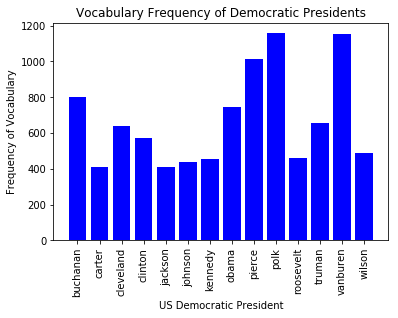

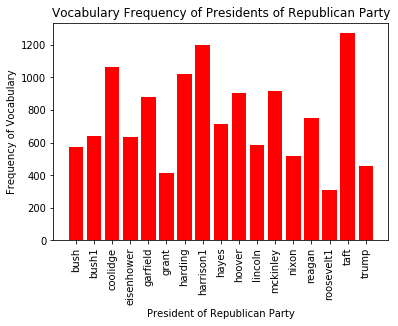

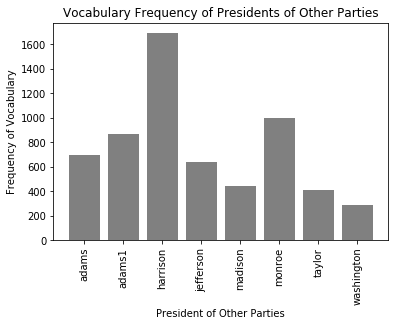

In [8]:
timeline = presidentdf[['keyname','president_name','year','vocab_revised','party_name']]

reptimeline = timeline[(timeline['party_name'] == 'republican')]
demotimeline = timeline[(timeline['party_name'] == 'democrats')]
othertimeline = timeline[(timeline['party_name'] != 'democrats') & (timeline['party_name'] != 'republican')]

repgroup = reptimeline.groupby('president_name')['vocab_revised'].mean()
demogroup = demotimeline.groupby('president_name')['vocab_revised'].mean()
othergroup = othertimeline.groupby('president_name')['vocab_revised'].mean()

repgroupdf = pd.DataFrame(repgroup).reset_index('president_name')
demogroupdf = pd.DataFrame(demogroup).reset_index('president_name')
othergroupdf = pd.DataFrame(othergroup).reset_index('president_name')

import matplotlib.pyplot as plt

plt.bar(demogroupdf.president_name,demogroupdf.vocab_revised, color = 'blue')
plt.xlabel('US Democratic President')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of Vocabulary')
plt.title('Vocabulary Frequency of Democratic Presidents')
plt.show()

plt.bar(repgroupdf.president_name,repgroupdf.vocab_revised, color = 'red')
plt.xlabel('President of Republican Party')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of Vocabulary')
plt.title('Vocabulary Frequency of Presidents of Republican Party')
plt.show()

plt.bar(othergroupdf.president_name,othergroupdf.vocab_revised, color = 'grey')
plt.xlabel('President of Other Parties')
plt.xticks(rotation = 90)
plt.ylabel('Frequency of Vocabulary')
plt.title('Vocabulary Frequency of Presidents of Other Parties')
plt.show()

### Question 3: What are the five most frequently used words (exclusive of stop words) used by each president? Do Democratic presidents use a different set of words than Republican presidents?

## Part 1 

In [9]:
frequentwords = {}

for key in presidentallwords:
    #print(key)
    wordsofpresident = {}
    frequent_words = []
    speechword = presidentallwords[key]
    n = len(presidentallwords[key])
    
    for i in range (0,n):
        for word in speechword[i]:
            if word in wordsofpresident:
                wordsofpresident[word] += 1
            else:
                wordsofpresident[word] = 1
    for keyword,word in wordsofpresident.items():
        frequent_words.append((word,keyword))
        frequent_words.sort(reverse = True)
        frequent_5 = frequent_words[0:5]
        frequentwords[key] = frequent_5
        
for key in frequentwords:
    print('presidet ' + str(key)+ ' : ' + str(frequentwords[key]))

presidet washington : [(10, 'govern'), (9, 'everi'), (7, 'may'), (6, 'shall'), (6, 'public')]
presidet adams : [(24, 'nation'), (20, 'peopl'), (20, 'govern'), (13, 'may'), (12, 'state')]
presidet jefferson : [(19, 'public'), (18, 'may'), (17, 'us'), (17, 'govern'), (17, 'citizen')]
presidet madison : [(17, 'war'), (17, 'nation'), (11, 'countri'), (10, 'state'), (8, 'unit')]
presidet monroe : [(56, 'state'), (50, 'great'), (40, 'govern'), (32, 'nation'), (31, 'war')]
presidet adams1 : [(22, 'govern'), (21, 'nation'), (20, 'union'), (16, 'upon'), (14, 'gener')]
presidet jackson : [(23, 'govern'), (15, 'power'), (13, 'state'), (13, 'peopl'), (11, 'public')]
presidet vanburen : [(20, 'peopl'), (20, 'everi'), (19, 'govern'), (17, 'institut'), (17, 'countri')]
presidet harrison : [(67, 'power'), (51, 'govern'), (45, 'constitut'), (41, 'state'), (38, 'peopl')]
presidet polk : [(50, 'govern'), (42, 'state'), (32, 'union'), (27, 'power'), (23, 'protect')]
presidet taylor : [(15, 'shall'), (8, '

## Part 2

In [10]:
rep_allwords = []
demo_allwords = []
other_allwords = []

for i in range(len(wordsperparties['republican'])):
    for word in wordsperparties['republican'][i]:
        rep_allwords.append(word) 
        
for i in range(len(wordsperparties['democrats'])):
    for word in wordsperparties['democrats'][i]:
        demo_allwords.append(word) 

for i in range(len(wordsperparties['others'])):
    for word in wordsperparties['others'][i]:
        other_allwords.append(word) 


print('No. of Republican Presidents: ' + str(len(wordsperparties['republican'])) + '  total words used : ' + str(len(rep_allwords)))
print('No. of Democratic Presidents: ' + str(len(wordsperparties['democrats'])) + '  total words used : ' + str(len(demo_allwords)))
print('No. of Other Presidents: ' + str(len(wordsperparties['others'])) + '  total words used : ' + str(len(other_allwords)))

#print(len(wordsperparties['democrats']), len(demo_allwords))

No. of Republican Presidents: 24  total words used : 29159
No. of Democratic Presidents: 22  total words used : 21427
No. of Other Presidents: 12  total words used : 13983


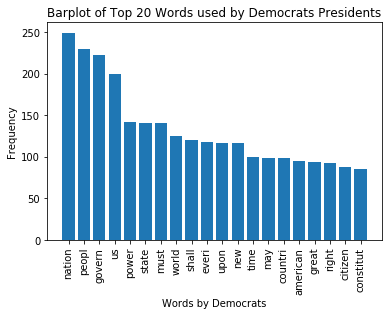

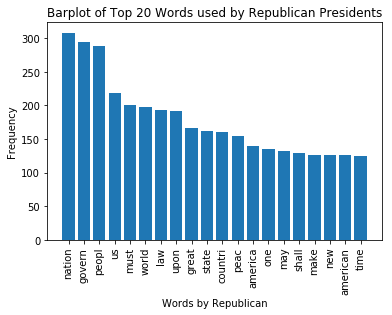

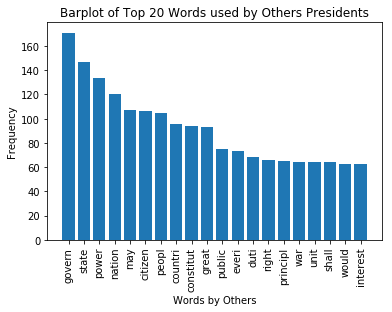

In [11]:
demowords = {}
repwords = {}
otherwords = {}
frequent_demowords = []
frequent_repwords = []
frequent_otherwords = []

for word in demo_allwords:
    if word in demowords:
        demowords[word] += 1
    else:
        demowords[word] = 1     
for keyword,count in demowords.items():
        frequent_demowords.append((count,keyword))
        frequent_demowords.sort(reverse = True)
        demofrequent_20 = frequent_demowords[0:20]

for word in rep_allwords:
    if word in repwords:
        repwords[word] += 1
    else:
        repwords[word] = 1    
for keyword,count in repwords.items():
        frequent_repwords.append((count,keyword))
        frequent_repwords.sort(reverse = True)
        repfrequent_20 = frequent_repwords[0:20]
        
for word in other_allwords:
    if word in otherwords:
        otherwords[word] += 1
    else:
        otherwords[word] = 1
for keyword,count in otherwords.items():
        frequent_otherwords.append((count,keyword))
        frequent_otherwords.sort(reverse = True)
        otherfrequent_20 = frequent_otherwords[0:20]

allwords = [demofrequent_20,repfrequent_20,otherfrequent_20]
parties = ['Democrats','Republican','Others']

for i in range(len(allwords)):

    values, words = zip(*allwords[i])

    plt.bar(words, values)
    plt.xlabel('Words by ' + str(parties[i]))
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.title('Barplot of Top 20 Words used by '  + str(parties[i]) + ' Presidents')
    plt.show()

In [12]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
len(intersection(demo_allwords,rep_allwords))

def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

Rep_NotDemo = Diff(rep_allwords,demo_allwords)
Demo_NotRep = Diff(demo_allwords,rep_allwords)

print('No. of words used by just Republican President but Not Democratic ' + str(len(Rep_NotDemo)))
print('No. of words used by just Democratic President but Not Republican ' + str(len(Demo_NotRep)))
print('No. of common words used by both Republican and Democratic Presidents: ' + str(len(intersection(demo_allwords,rep_allwords))))
#Source : https://www.geeksforgeeks.org/python-difference-two-lists/

No. of words used by just Republican President but Not Democratic 1463
No. of words used by just Democratic President but Not Republican 992
No. of common words used by both Republican and Democratic Presidents: 20075


### Question 4: Compute a sentiment (positive/negative) for each president, and draw three barplots of Democratic, Republican, and other presidents in chronological order. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

In [30]:
allspeech = {}
for key in speechdict:
    tempspeech = []
    finalspeech = []
    for speech in range(len(speechdict[key])):
        tempspeech = tempspeech + speechdict[key][speech]
    finalspeech = tempspeech
    allspeech[key] = finalspeech

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_president = {}
sentiment_president_republican = {}
sentiment_president_democratic = {}
sentiment_president_others = {}
#Source : Professor's InClass code

for key in allspeech:
    polarity = [0]*len(allspeech[key])
    Pol_scores = []
    #tweet_words = tweetlists[str(i)].split()
    #tweet_words = [w for w in tweet_words if w not in stop_words]

    for j, speech in enumerate(allspeech[key]):
        speech = speech.strip(punctuation).lower()
        speech = re.sub(r'http\S+', ' ', speech)
        speech = re.sub(r'@\S+', ' ',speech) #removing speech @
        speech = re.sub(r'#\S+', ' ',speech) #removing #
        speech = re.sub(r'&\w+', ' ',speech) #removing &
        speech = re.sub(r'[^a-z\s]+', ' ',speech) #removing single letters
        sentiment[j] = analyzer.polarity_scores(speech)
        #print(sentiment[j], line)
        polarity[j] = sentiment[j]['compound']
        Pol_scores.append(polarity[j])
    sentiment_president[key] = Pol_scores
    

for key in sentiment_president:
    avg_sentiment = sum(sentiment_president[key])/len(sentiment_president[key])
    if key in partiesdict['republican']:
        sentiment_president_republican[key] = avg_sentiment
    elif key in partiesdict['democrats']:
        sentiment_president_democratic[key] = avg_sentiment
    else:
        sentiment_president_others[key] = avg_sentiment
    
#Source : Twitter Sentiment Analysis - In Class Code

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5,1,'Average Sentiments of All Parties Presidents based on thier Inaugral Speeches')

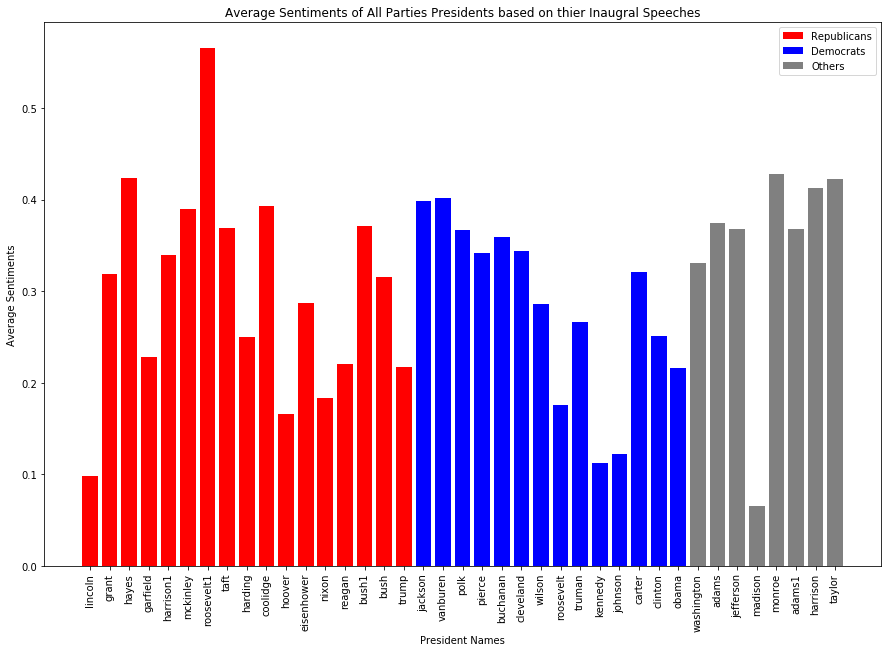

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.bar(sentiment_president_republican.keys(),sentiment_president_republican.values(), color = ['red'])
plt.xlabel("President Names -Republican")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
plt.title("Average Sentiments of Republican Presidents based on thier Inaugral Speeches")


plt.bar(sentiment_president_democratic.keys(),sentiment_president_democratic.values(), color = ['blue'])
plt.xlabel("President Names -Democratic")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
plt.title("Average Sentiments of Democratic Presidents based on thier Inaugral Speeches")


plt.bar(sentiment_president_others.keys(),sentiment_president_others.values(), color = ['grey'])
plt.xlabel("President Names")
plt.xticks(rotation = 90)
plt.ylabel("Average Sentiments")
plt.gca().legend(('Republicans','Democrats','Others'))
plt.title("Average Sentiments of All Parties Presidents based on thier Inaugral Speeches")


In [42]:
from statistics import mean

average_otherparty = mean(sentiment_president_others[k] for k in sentiment_president_others)
average_Democraticparty = mean(sentiment_president_democratic[k] for k in sentiment_president_democratic)
average_Republicparty = mean(sentiment_president_republican[k] for k in sentiment_president_republican)

print('Democratic : ' + str(average_Democraticparty))
print('Republican : ' + str(average_Republicparty))
print('Other Patrties: ' + str(average_otherparty))from statistics import mean


Democratic : 0.2832679036267762
Republican : 0.30233006505099147
Other Patrties: 0.34626885205538266


### From the Grpah Above:

#### Top 3 Presidents - Republican : Mckinley, Hayes, Coolidge
#### Top 3 Presidents - Democratic : VanBuren, Jackson, Polk
#### Top 3 Presidents - Other Parties : Monore, Taylor, William Harrison


#### Other Parties have highe positive mean sentiment compared to democrats or republicans
